In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten,LSTM

In [ ]:
train = pd.read_csv('/content/LSA+Word2vec_Tr.csv')
test = pd.read_csv('/content/LSA+Word2vec_Ind.csv')

In [ ]:
xtrain = train.drop(['Target'], axis = 1)
ytrain = train['Target']

In [ ]:
xtest = test.drop(['Target'], axis = 1)
ytest = test['Target']

In [ ]:
sample_size = xtrain.shape[0] # number of samples in train set
time_steps  = xtrain.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

In [ ]:
train_data_reshaped = xtrain.values.reshape(sample_size,time_steps,input_dimension)
n_timesteps = train_data_reshaped.shape[1]
n_features  = train_data_reshaped.shape[2]

In [ ]:
#ANN_Build_Up

ann = Sequential()

ann.add(Dense(256, activation = 'relu', input_shape=(n_timesteps,n_features)))
ann.add(Dense(128, activation = 'relu'))
ann.add(Dense(176, activation = 'relu'))

ann.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
ann.add(BatchNormalization())

ann.add(MaxPool1D(pool_size=2))

ann.add(Flatten())

ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Build CNN Model

cnn = Sequential()

cnn.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(n_timesteps,n_features)))
cnn.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

cnn.add(MaxPool1D(pool_size=2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Define RNN model
rnn = Sequential()

# RNN layers
rnn.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps,n_features)))
rnn.add(SimpleRNN(64, activation='tanh', return_sequences=False))

# Fully connected layers
rnn.add(Dense(64, activation='relu'))
rnn.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
rnn.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Build CNN_ANN model
CNN_ANN = Sequential()

# CNN layers
CNN_ANN.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
CNN_ANN.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
CNN_ANN.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
CNN_ANN.add(MaxPooling1D(pool_size=2))
CNN_ANN.add(BatchNormalization())

CNN_ANN.add(Flatten())
# ANN layers
# ANN layers
CNN_ANN.add(Dense(256, activation = 'relu'))
CNN_ANN.add(Dense(256, activation = 'relu'))
CNN_ANN.add(Dense(128, activation = 'relu'))
CNN_ANN.add(BatchNormalization())
CNN_ANN.add(Dense(64, activation='tanh'))

# Fully connected layers
CNN_ANN.add(Dense(64, activation='relu'))
CNN_ANN.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
CNN_ANN.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Build CNN_LSTM model

CNN_LSTM = Sequential()

CNN_LSTM.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
CNN_LSTM.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
CNN_LSTM.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

CNN_LSTM.add(MaxPool1D(pool_size=2))

CNN_LSTM.add(LSTM(128, activation='relu'))

CNN_LSTM.add(Flatten())

CNN_LSTM.add(Dense(64, activation='relu'))
CNN_LSTM.add(Dense(1, activation='sigmoid'))

CNN_LSTM.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Build CNN + RNN model
DeepDPPIV = Sequential()

# CNN layers
DeepDPPIV.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
DeepDPPIV.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
DeepDPPIV.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
DeepDPPIV.add(MaxPooling1D(pool_size=2))
DeepDPPIV.add(BatchNormalization())

# RNN layers
DeepDPPIV.add(SimpleRNN(128, activation='tanh', return_sequences=True))
DeepDPPIV.add(SimpleRNN(64, activation='tanh', return_sequences=False))

# Fully connected layers
DeepDPPIV.add(Dense(64, activation='relu'))
DeepDPPIV.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
DeepDPPIV.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.7461 - loss: 0.5076
Epoch 2/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.9900 - loss: 0.1134
Epoch 3/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 1.0000 - loss: 0.0208
Epoch 4/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.9983 - loss: 0.0109
Epoch 5/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 6/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 7/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 8/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 1.0000 - loss: 9.2275e-04
Epoch 9/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 1.0000 - loss: 0.0010
Epoch 10/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 1.0000 - loss: 7.0382e-04
Epoch 11/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 1.0000 - loss: 3.8520e-04
Epoch 12/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 2

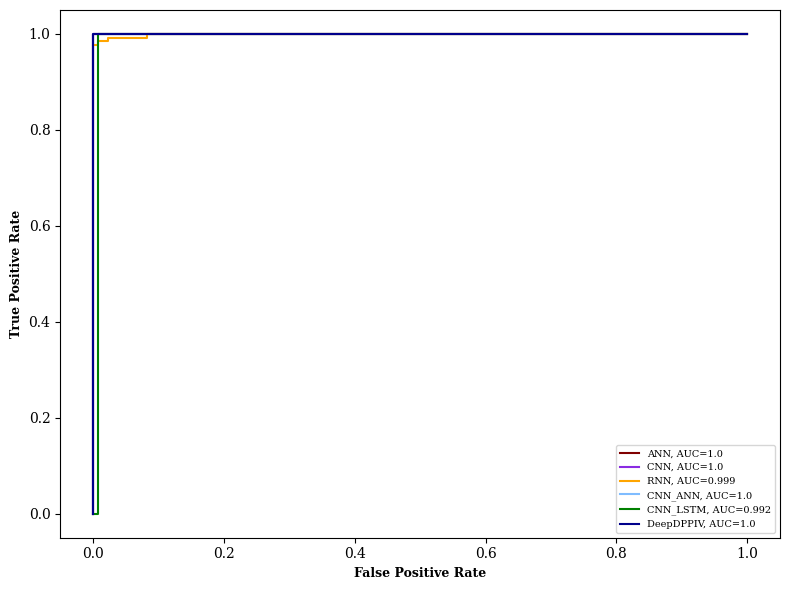

<Figure size 800x600 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"] = [6, 4]
#plt.rcParams["figure.autolayout"] = True

plt.rcParams.update({'font.family':'serif'})

ann.fit(xtrain, ytrain, epochs = 75, batch_size= 64)
cnn.fit(xtrain, ytrain, epochs = 75, batch_size= 64)
rnn.fit(xtrain, ytrain, epochs = 75, batch_size= 64)
CNN_ANN.fit(xtrain, ytrain, epochs = 75, batch_size= 64)
CNN_LSTM.fit(xtrain, ytrain, epochs = 75, batch_size= 64)
DeepDPPIV.fit(xtrain, ytrain, epochs = 75, batch_size= 32)

pred = ann.predict(xtest).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest, pred)
auc = round(metrics.roc_auc_score(ytest, pred), 3)
plt.plot(fpr,tpr, color="#800000", label="ANN, AUC="+str(auc))

pred = cnn.predict(xtest).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest, pred)
auc = round(metrics.roc_auc_score(ytest, pred), 3)
plt.plot(fpr,tpr, color="#8A2BE2", label="CNN, AUC="+str(auc))

pred = rnn.predict(xtest).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest, pred)
auc = round(metrics.roc_auc_score(ytest, pred), 3)
plt.plot(fpr,tpr, color="#FFA500", label="RNN, AUC="+str(auc))

pred = CNN_ANN.predict(xtest).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest, pred)
auc = round(metrics.roc_auc_score(ytest, pred), 3)
plt.plot(fpr,tpr, color="#7FBCFF", label="CNN_ANN, AUC="+str(auc))

pred = CNN_LSTM.predict(xtest).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest, pred)
auc = round(metrics.roc_auc_score(ytest, pred), 3)
plt.plot(fpr,tpr, color="#008000", label="CNN_LSTM, AUC="+str(auc))

pred = DeepDPPIV.predict(xtest).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest, pred)
auc = round(metrics.roc_auc_score(ytest, pred), 3)
plt.plot(fpr,tpr, color="#00008B", label="DeepDPPIV, AUC="+str(auc))



plt.xlabel('False Positive Rate', fontweight = 'bold',  fontsize=9)
plt.ylabel('True Positive Rate', fontweight = 'bold',  fontsize=9)
plt.legend(loc = 'lower right', fontsize=7)

plt.tight_layout()
plt.show()
plt.savefig('ROC Curve.png', dpi=800)
plt.savefig('ROC Curve.pdf', dpi=800)

In [ ]:
plt.tight_layout()
plt.show()
plt.savefig('ROC Curve.png', dpi=800)
plt.savefig('ROC Curve.pdf', dpi=800)
plt.close()

<Figure size 800x600 with 0 Axes>